<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-14 05:06:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-14 05:06:02 (14.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
df.nunique()

Unnamed: 0        346
Unnamed: 0.1      346
loan_status         2
Principal           5
terms               3
effective_date      7
due_date           23
age                32
education           4
Gender              2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


In [10]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [11]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

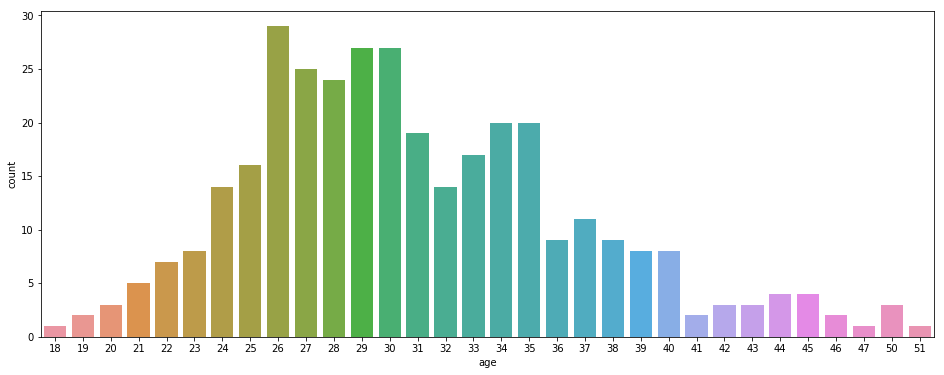

In [12]:
pylab.rcParams[ 'figure.figsize' ] = 16 , 6
sns.countplot(x = 'age' , data = df)

In [13]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [14]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

Lets plot some columns to underestand data better:

In [15]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

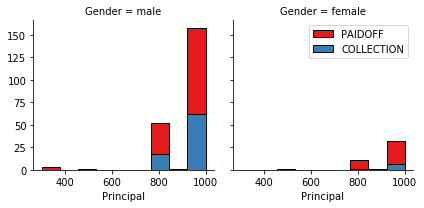

In [16]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

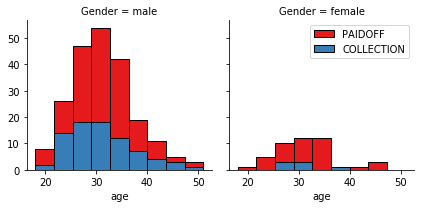

In [17]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

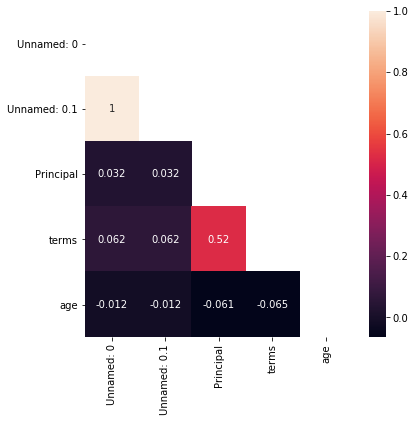

In [18]:
fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True)

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

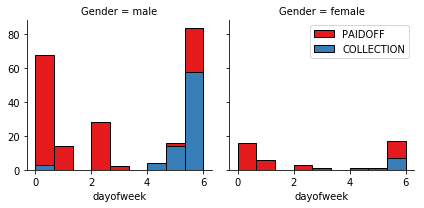

In [19]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less than day 4 

In [20]:
table = pd.crosstab(index=df["dayofweek"], 
                          columns=df["loan_status"])

table

loan_status,COLLECTION,PAIDOFF
dayofweek,,
0,3,84
1,0,20
2,0,31
3,0,3
4,4,4
5,14,17
6,65,101


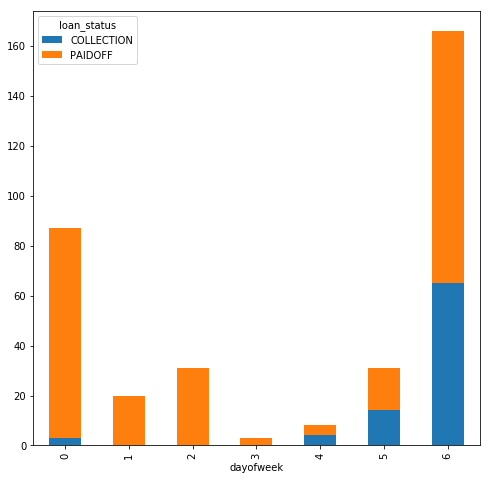

In [21]:
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [22]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [23]:
df['weekend'].value_counts()

1    205
0    141
Name: weekend, dtype: int64

## Convert Categorical features to numerical values

Lets look at gender:

In [24]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [25]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [26]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [27]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [28]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [29]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [30]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Train Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [34]:
k = 4 
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred4 = neigh4.predict(X_test)
print("Train Accuracy: ", metrics.accuracy_score(y_train, neigh4.predict(X_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred4))

Train Accuracy:  0.7681159420289855
Test Accuracy:  0.6762589928057554


In [35]:
k = 5
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred5 = neigh5.predict(X_test)
print("Train Accuracy: ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred5))

Train Accuracy:  0.7874396135265701
Test Accuracy:  0.7482014388489209


#### Finding best k

In [36]:
Ks = 60
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.69064748, 0.58273381, 0.72661871, 0.67625899, 0.74820144,
       0.67625899, 0.74820144, 0.70503597, 0.77697842, 0.73381295,
       0.74820144, 0.71942446, 0.74820144, 0.72661871, 0.74100719,
       0.73381295, 0.74820144, 0.72661871, 0.75539568, 0.72661871,
       0.76258993, 0.71942446, 0.76258993, 0.74820144, 0.76258993,
       0.76258993, 0.76258993, 0.76258993, 0.76258993, 0.76258993,
       0.79136691, 0.77697842, 0.79136691, 0.79136691, 0.79136691,
       0.79856115, 0.78417266, 0.79136691, 0.79136691, 0.78417266,
       0.83453237, 0.83453237, 0.82733813, 0.83453237, 0.82014388,
       0.82014388, 0.82014388, 0.82733813, 0.82014388, 0.82014388,
       0.82014388, 0.82014388, 0.82014388, 0.82014388, 0.82014388,
       0.82014388, 0.82014388, 0.82014388, 0.82014388])

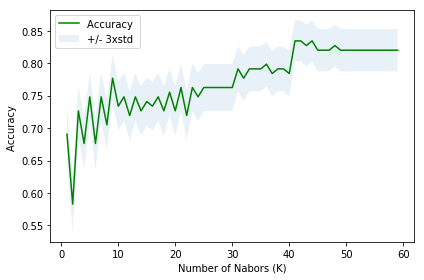

In [37]:
plt.subplots(figsize=(6, 4))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy is", round(mean_acc.max()*100,2),"%  with k=", mean_acc.argmax()+1)

The best accuracy is 83.45 %  with k= 41


##### Building Model with best k:41

In [39]:
k = 41
neigh41 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred41 = neigh41.predict(X_test)
print(neigh41)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=41, p=2,
           weights='uniform')


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [42]:
parameters = {'max_depth': range(1,20,2),
                  'max_features': range(1,8),
                 'random_state':range(0,200,5),
                 'criterion':['gini','entropy'],
                 }
grid_search = GridSearchCV(tree, param_grid = parameters,
                          cv =10)
grid_search.fit(X_train, y_train)
print ("Best Score: {}".format(grid_search.best_score_))
grid_search.best_params_

Best Score: 0.7644628099173554


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'random_state': 70}

In [43]:
tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, max_features= 8, random_state= 70).fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print(tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=70, splitter='best')


# Support Vector Machine

In [44]:
import sklearn.model_selection
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.4,random_state=50)
from sklearn import svm
from sklearn.metrics import accuracy_score

In [45]:
svmclassifier=svm.SVC(kernel='linear',degree=1).fit(X_train,y_train)
y_pred_linear=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_linear)

0.7410071942446043

In [46]:
svmclassifier=svm.SVC(kernel='poly',degree=1).fit(X_train,y_train)
y_pred_poly=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_poly)

0.8201438848920863

In [47]:
svmclassifier=svm.SVC(kernel='sigmoid',degree=1).fit(X_train,y_train)
y_pred_sigmoid=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_sigmoid)

0.7482014388489209

In [48]:
svmclassifier=svm.SVC(kernel='rbf',degree=1).fit(X_train,y_train)
y_pred_rbf=svmclassifier.predict(X_test)
accuracy_score(y_test,y_pred_rbf)

0.7769784172661871

In [49]:
# I selected the kernel rbf

In [50]:
print(svmclassifier)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression().fit(X_train,y_train)
y_pred_log = logmodel.predict(X_test)
from sklearn.metrics import log_loss
print(logmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# Model Evaluation using Test set

In [52]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [53]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-14 05:09:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-14 05:09:41 (173 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [54]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male


In [55]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [56]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null datetime64[ns]
due_date          54 non-null datetime64[ns]
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dayofweek         54 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 4.7+ KB


In [58]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

In [59]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [60]:
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head(2)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0


In [61]:
test_X = test_feature
test_y = test_df['loan_status']

In [62]:
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# KNN

#### Prediction with built model (training data = X_train,y_train of loan_train.csv & testing data = test_X of loan_test.csv)

In [63]:
y_pred41_test = neigh41.predict(test_X)
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred41_test)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred41_test,average='weighted'))

Jaccard Similarity Score :  74.07 %
F1-SCORE : 0.66


#### Prediction with a new model where (training data =X,y of loan_train.csv & testing data = test_X of loan_test.csv)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
neigh41 = KNeighborsClassifier(n_neighbors = 41).fit(X,y)
y_pred41test = neigh41.predict(test_X)
print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred41test))
print("Classification Report:")
print(classification_report(test_y,y_pred41test))
print("Test Accuracy: ", round(metrics.accuracy_score(test_y, y_pred41test),3)*100,'%')
print('Train Accuracy: ',metrics.accuracy_score(y,neigh41.predict(X))*100,'%')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred41test)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred41test,average='weighted'))

Confusion Matrix:
[[ 3 11]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

  COLLECTION       1.00      0.21      0.35        14
     PAIDOFF       0.78      1.00      0.88        40

   micro avg       0.80      0.80      0.80        54
   macro avg       0.89      0.61      0.62        54
weighted avg       0.84      0.80      0.74        54

Test Accuracy:  79.60000000000001 %
Train Accuracy:  75.43352601156069 %
Jaccard Similarity Score :  79.63 %
F1-SCORE : 0.74


# Decision Tree

#### Prediction with built model (training data = X_train,y_train of loan_train.csv & testing data = test_X of loan_test.csv)

In [67]:
y_pred_tree_test = tree.predict(test_X)
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_tree_test)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred_tree_test,average='weighted'))

Jaccard Similarity Score :  77.78 %
F1-SCORE : 0.71


#### Prediction with a new model where (training data =X,y of loan_train.csv & testing data = test_X of loan_test.csv)

In [68]:
tree.fit(X,y)
y_pred_test = tree.predict(test_X)
print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred_test))
print("Classification Report:")
print(classification_report(test_y,y_pred_test))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_test)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred_test,average='weighted'))
print('Train Accuracy: ',metrics.accuracy_score(y,tree.predict(X))*100,'%')

Confusion Matrix:
[[ 6  8]
 [ 7 33]]
Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.46      0.43      0.44        14
     PAIDOFF       0.80      0.82      0.81        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.72      0.72      0.72        54

Jaccard Similarity Score :  72.22 %
F1-SCORE : 0.72
Train Accuracy:  76.878612716763 %


# SVM

#### Prediction with built model (training data = X_train,y_train of loan_train.csv & testing data = test_X of loan_test.csv)

In [69]:
y_pred_rbf_test=svmclassifier.predict(test_X)
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_rbf_test)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred_rbf_test,average='weighted'))

Jaccard Similarity Score :  83.33 %
F1-SCORE : 0.82


#### Prediction with a new model where (training data =X,y of loan_train.csv & testing data = test_X of loan_test.csv)

In [70]:
svmclassifier.fit(X,y)
y_pred_rbf=svmclassifier.predict(test_X)
print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred_rbf))
print("Classification Report:")
print(classification_report(test_y,y_pred_rbf))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_rbf)*100,2),'%')
print('F1-SCORE : %.2f' % f1_score(test_y,y_pred_rbf,average='weighted'))
print('Train Accuracy: ',metrics.accuracy_score(y, svmclassifier.predict(X))*100,'%')

Confusion Matrix:
[[ 0 14]
 [ 1 39]]
Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54

Jaccard Similarity Score :  72.22 %
F1-SCORE : 0.62
Train Accuracy:  76.01156069364163 %


# Logistic Regression

#### Prediction with built model (training data = X_train,y_train of loan_train.csv & testing data = test_X of loan_test.csv)

In [71]:
y_pred_log_test = logmodel.predict(test_X)
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_log_test)*100,2),'%')
print('F1-SCORE :  %.2f' % f1_score(test_y,y_pred_log_test,average='weighted'))
LR_prob = logmodel.predict_proba(test_X)
print('LogLoss: %.2f' % log_loss(test_y, LR_prob))

Jaccard Similarity Score :  77.78 %
F1-SCORE :  0.74
LogLoss: 0.47


#### Prediction with a new model where (training data =X,y of loan_train.csv & testing data = test_X of loan_test.csv)

In [72]:
logmodel.fit(X,y)
y_pred_logtest= logmodel.predict(test_X)
print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred_logtest))
print("Classification Report:")
print(classification_report(test_y,y_pred_logtest))
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(test_y,y_pred_logtest)*100,2),'%')
print('F1-SCORE :  %.2f' % f1_score(test_y,y_pred_logtest,average='weighted'))
print('Train Accuracy: ',metrics.accuracy_score(y, logmodel.predict(X))*100,'%')
LR_prob = logmodel.predict_proba(test_X)
print('LogLoss: %.2f' % log_loss(test_y, LR_prob))

Confusion Matrix:
[[ 1 13]
 [ 0 40]]
Classification Report:
              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54

Jaccard Similarity Score :  75.93 %
F1-SCORE :  0.67
Train Accuracy:  75.43352601156069 %
LogLoss: 0.48


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [80]:
Algoritm=['KNN','Decision Tree','SVM','LogisticRegression']

j_1=round(jaccard_similarity_score(test_y,y_pred41_test)*100,2)
j_2=round(jaccard_similarity_score(test_y,y_pred_tree_test)*100,2)
j_3=round(jaccard_similarity_score(test_y,y_pred_rbf_test)*100,2)
j_4=round(jaccard_similarity_score(test_y,y_pred_log_test)*100,2)
Jaccard=[j_1,j_2,j_3,j_4]

f1_1='%.2f' % f1_score(test_y,y_pred41_test,average='weighted')
f1_2='%.2f' % f1_score(test_y,y_pred_tree_test,average='weighted')
f1_3='%.2f' % f1_score(test_y,y_pred_rbf_test,average='weighted')
f1_4='%.2f' % f1_score(test_y,y_pred_log_test,average='weighted')
F1_score=[f1_1,f1_2,f1_3,f1_4]

In [81]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccard": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN,' %.2f' %log_loss(test_y, LR_prob)]})

In [82]:
table

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,74.07,0.66,NaN
1,Decision Tree,77.78,0.71,NaN
2,SVM,83.33,0.82,NaN
3,LogisticRegression,77.78,0.74,0.48
